In [1]:
# Area Plots, Histograms, and Bar Charts
# Import Libraries

# Import the matplotlib library.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.10.1


In [2]:
# Fetching Data

# Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website

# In this lab, we will focus on the Canadian Immigration data and use the already cleaned dataset and can be fetched from here.

# You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skills Data pre-processing with Pandas

In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
print("Data read into a pandas dataframe.")

Data read into a pandas dataframe.


In [4]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
# # print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In [6]:
# Set the country name as index - useful for quickly looking up countries using .loc method.

In [7]:
df_can.set_index('Country', inplace = True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
# Notice now the country names now serve as indices.
print("Data Dimensions:", df_can.shape)

Data Dimensions: (195, 38)


In [9]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data

years = list(map(str, range(1980, 2014)))

In [10]:
# Area Plots
# In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. 
# With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

In [11]:
df_can.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [12]:
# Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN, i.e. not a number, values will default to 0). 
# To produce an unstacked plot, set parameter stacked to value False.

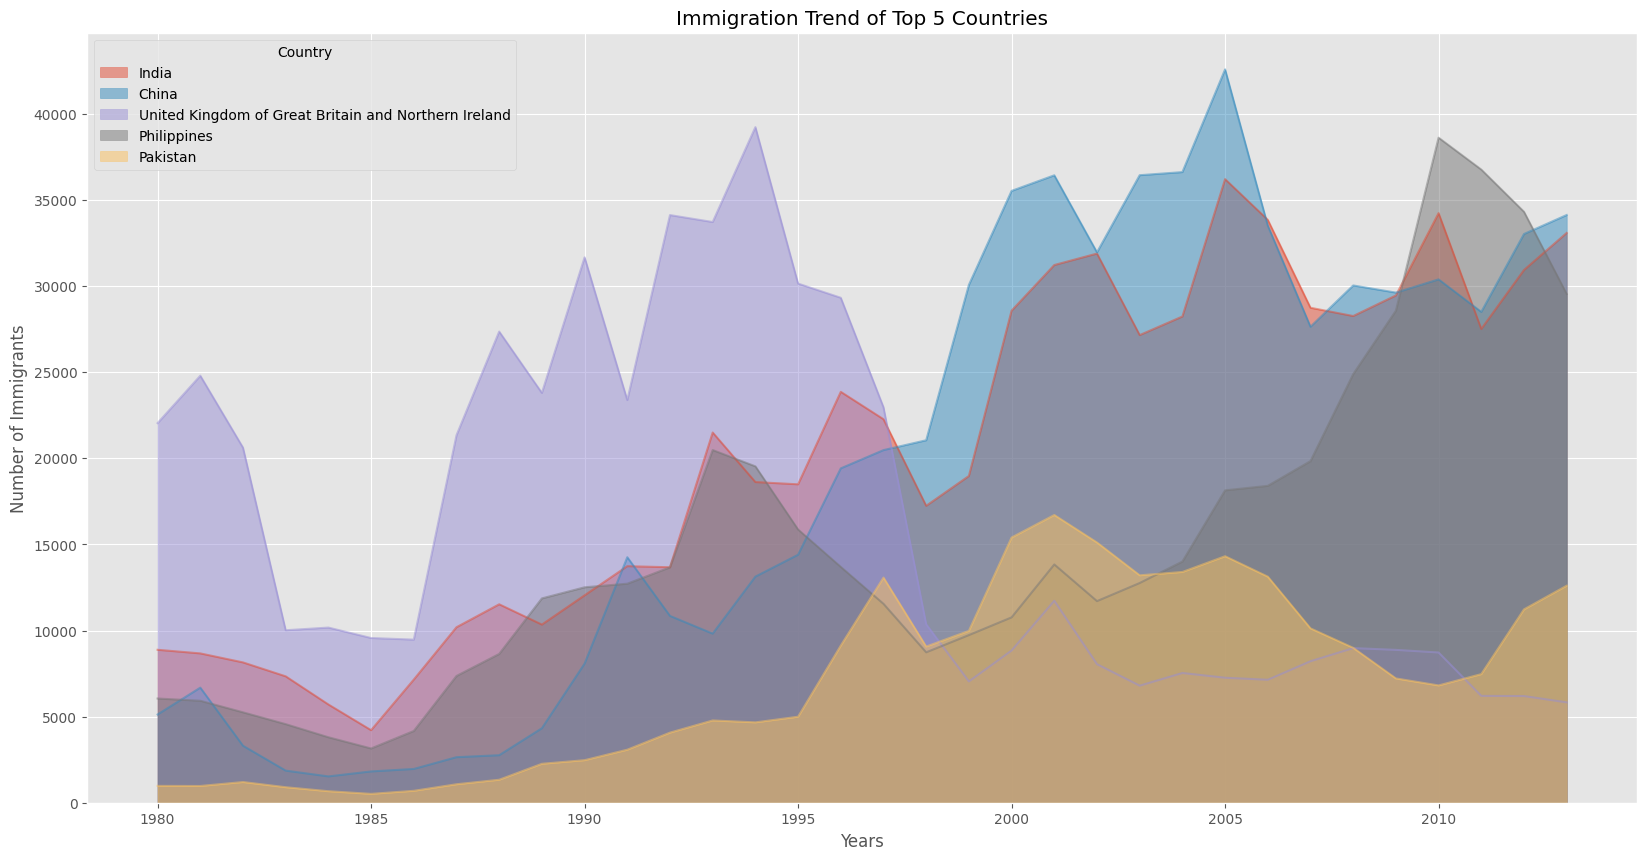

In [13]:
# let's change the index values of df_top5 to type integer for plotting

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area', 
             stacked = False, 
             figsize = (20, 10)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

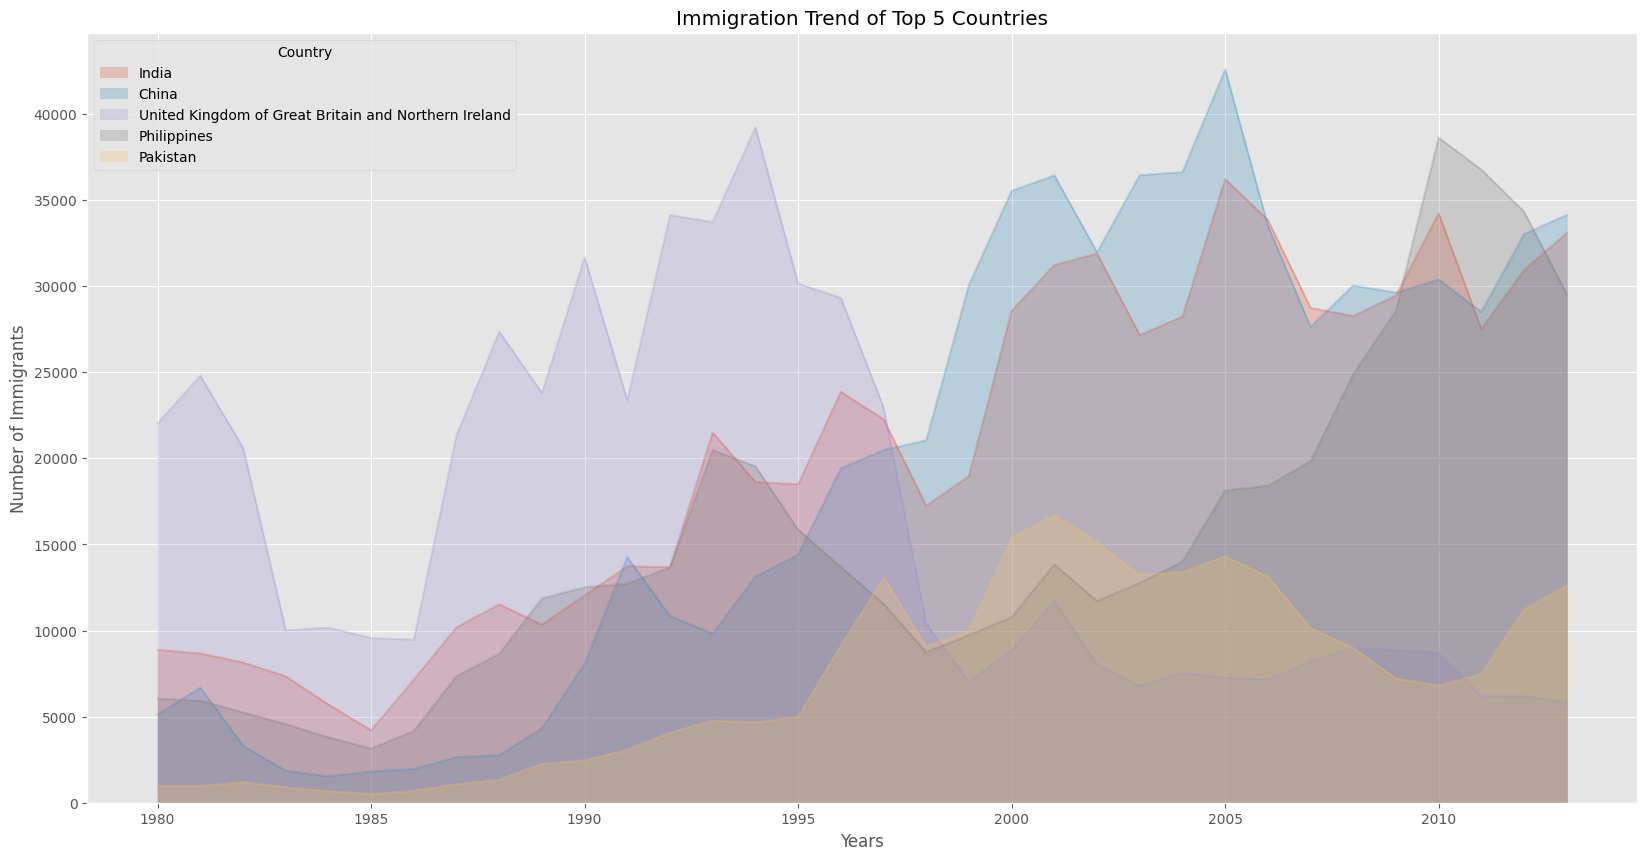

In [14]:
# The unstacked plot has a default transparency (alpha value) at 0.5. 
# We can modify this value by passing in the alpha parameter.

df_top5.plot(kind = 'area',
             alpha = 0.25, # 0 - 1, default alpha value = 0.5
             stacked = False,
             figsize = (20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

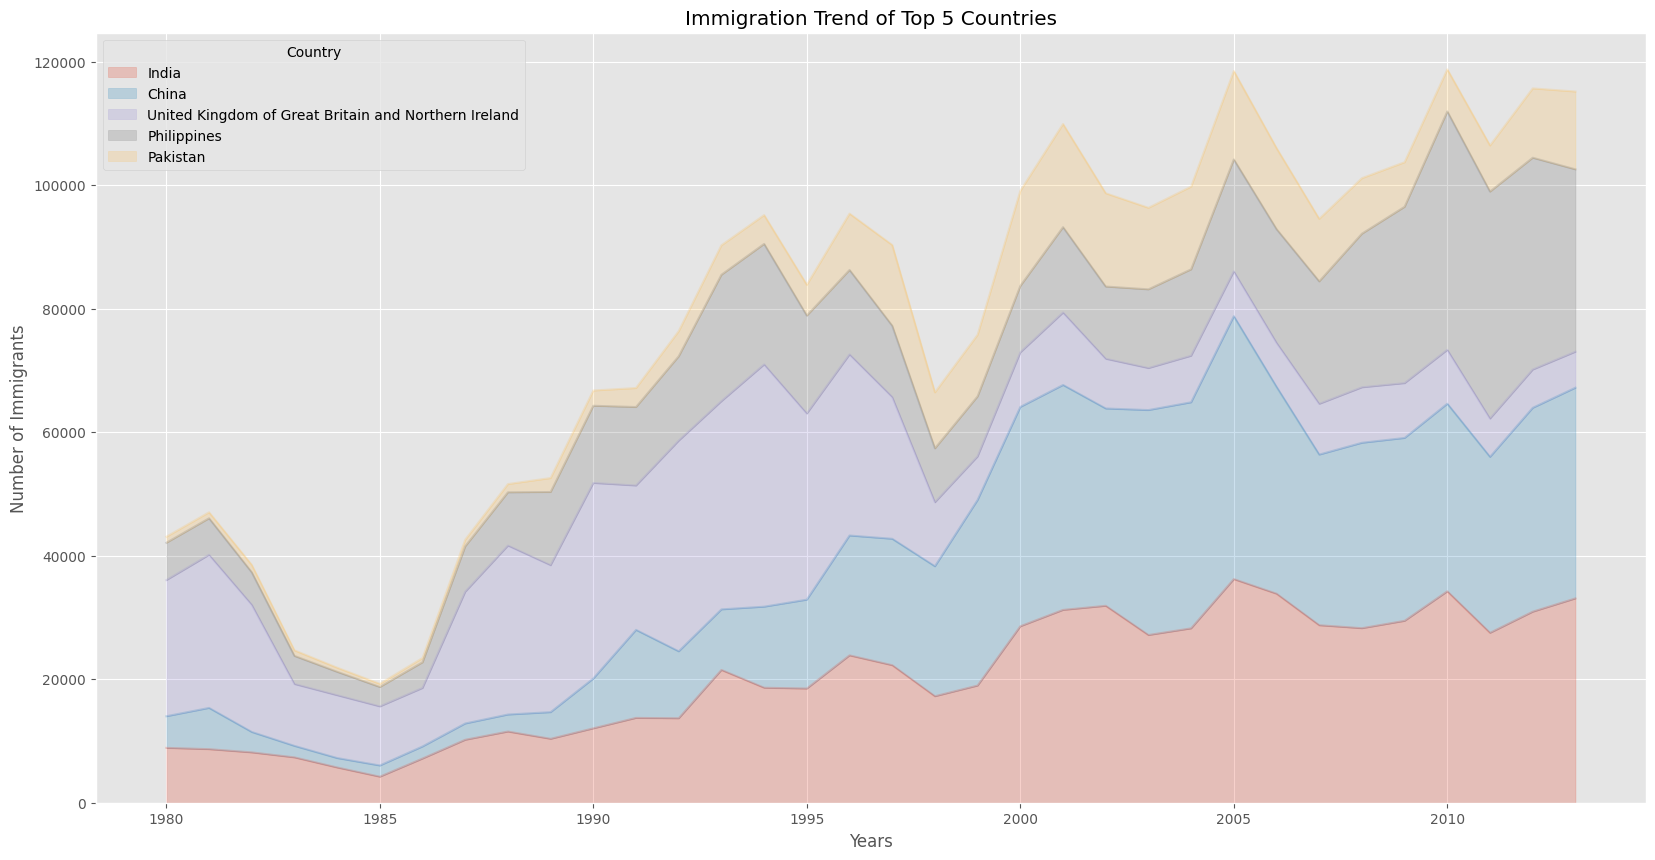

In [15]:
# Two types of plotting
# As we discussed in the video lectures, there are two styles/options of plotting with matplotlib， plotting using the Artist layer and plotting using the scripting layer.

# Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'
# You can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; 
# for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

 # Option 1: This is what we have been using so far

df_top5.plot(kind = 'area',
             alpha = 0.25, # 0 - 1, default alpha value = 0.5
             figsize = (20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [16]:
# Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)
# You can use an Axes instance of your current plot and store it in a variable (eg. ax). 
# You can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). 
# For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

# This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

# In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.

Text(0.5, 0, 'Years')

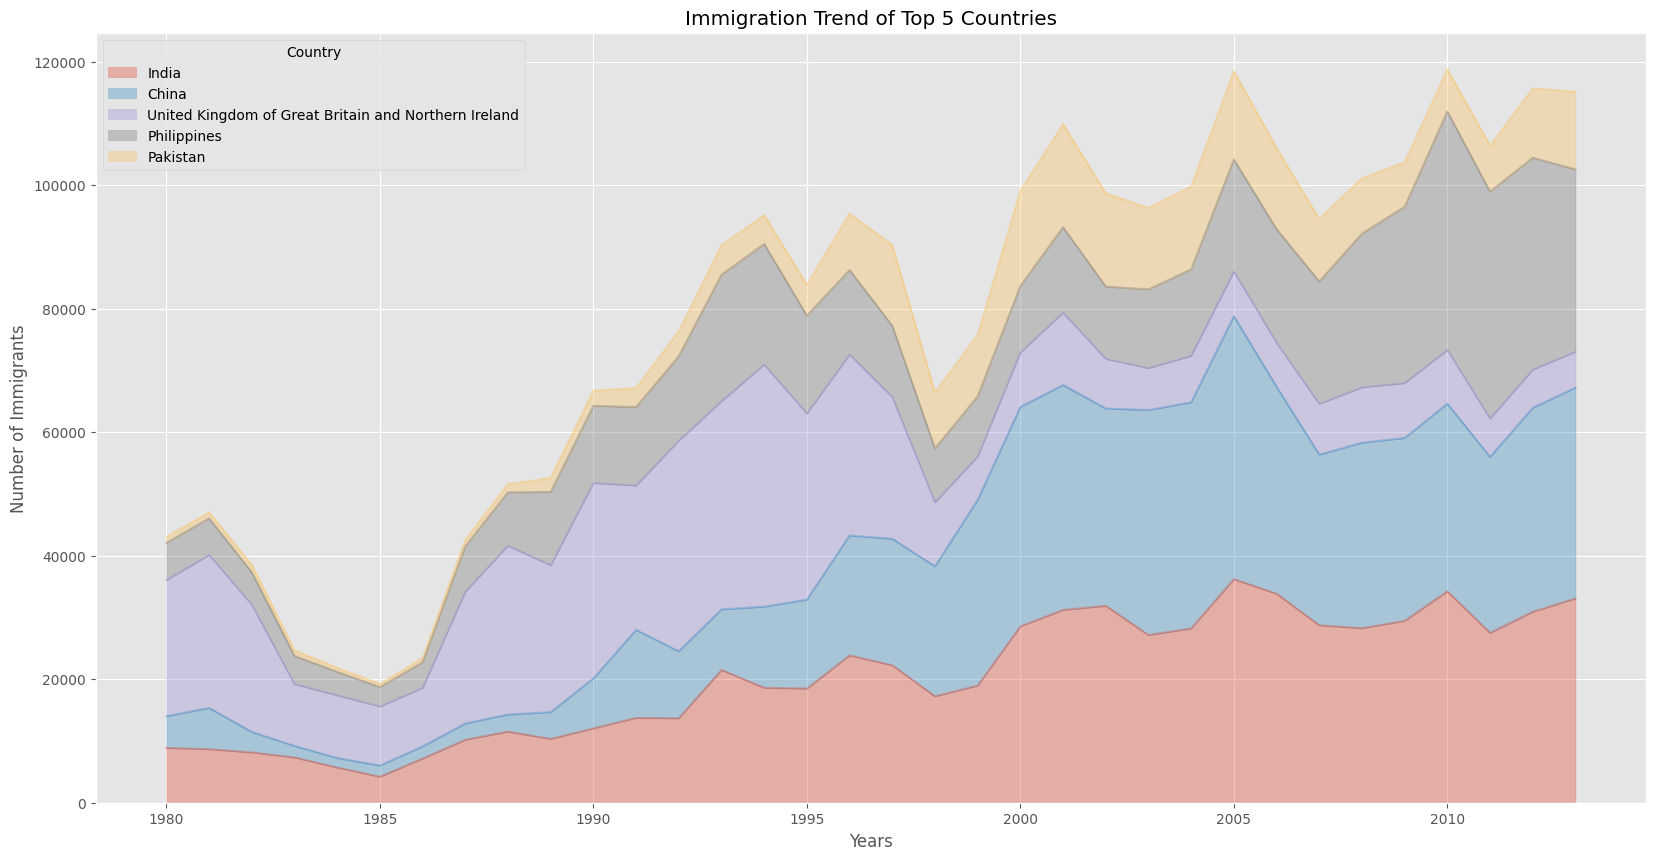

In [17]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [18]:
# Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 
# Use a transparency value of 0.45.

In [19]:
#years = list(map(str, range(1980, 2014)))

In [20]:
#df_can.sort_values(['Total'], ascending = True, axis = 0, inplace = True)
df_least5= df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


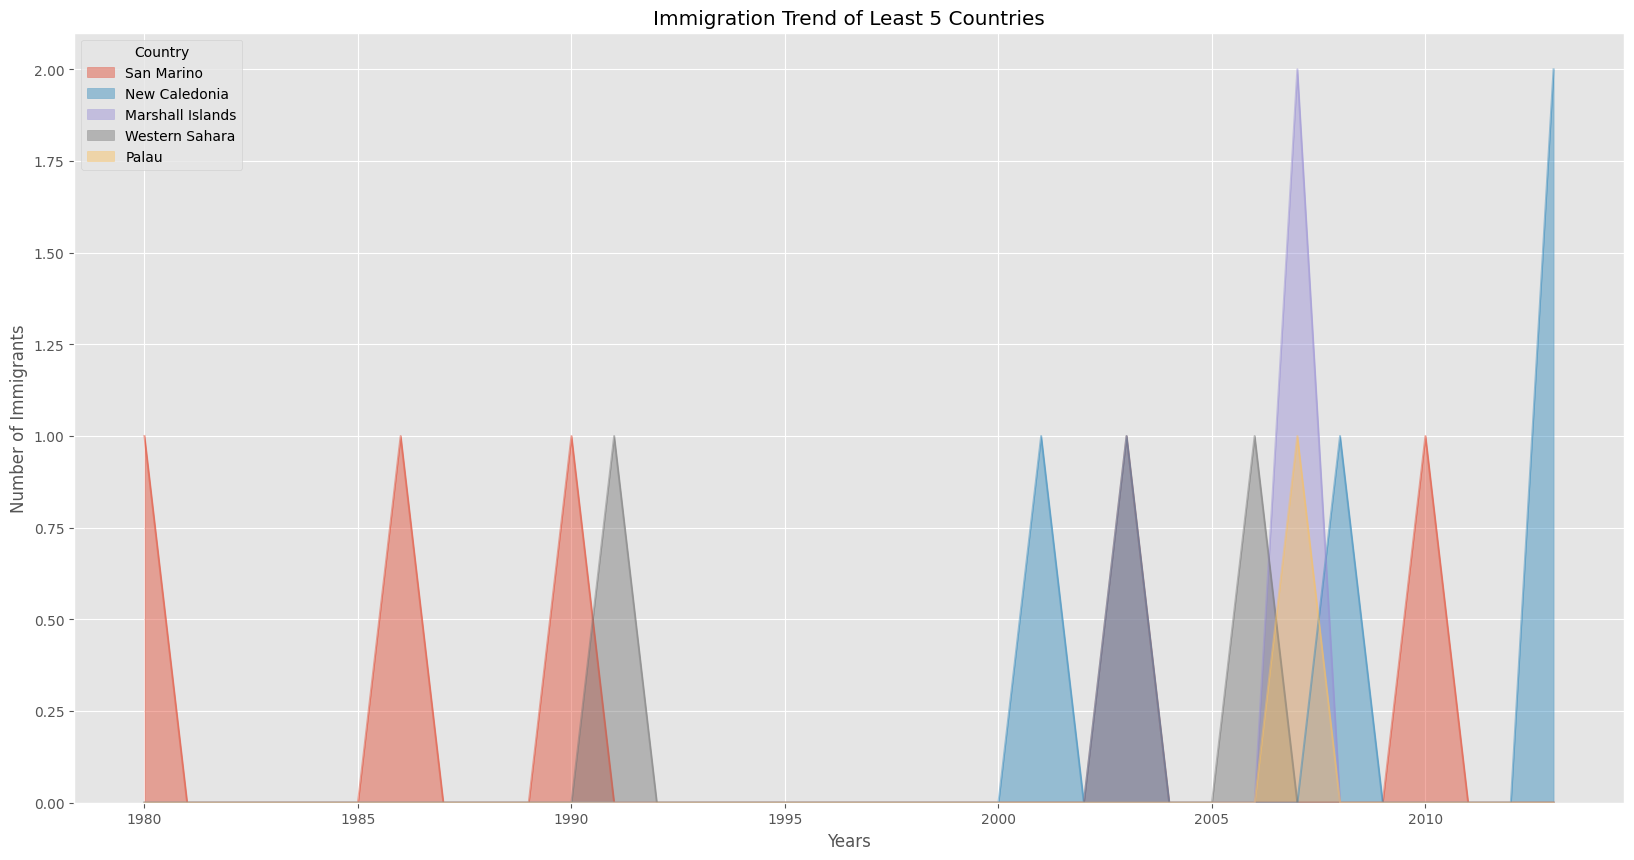

In [21]:

df_least5.index = df_least5.index.map(int) # lets change the index values of df_least5 to type integer for plotting.

df_least5.plot(kind = 'area',
               alpha = 0.45,
               stacked = False,
               figsize = (20, 10))

plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

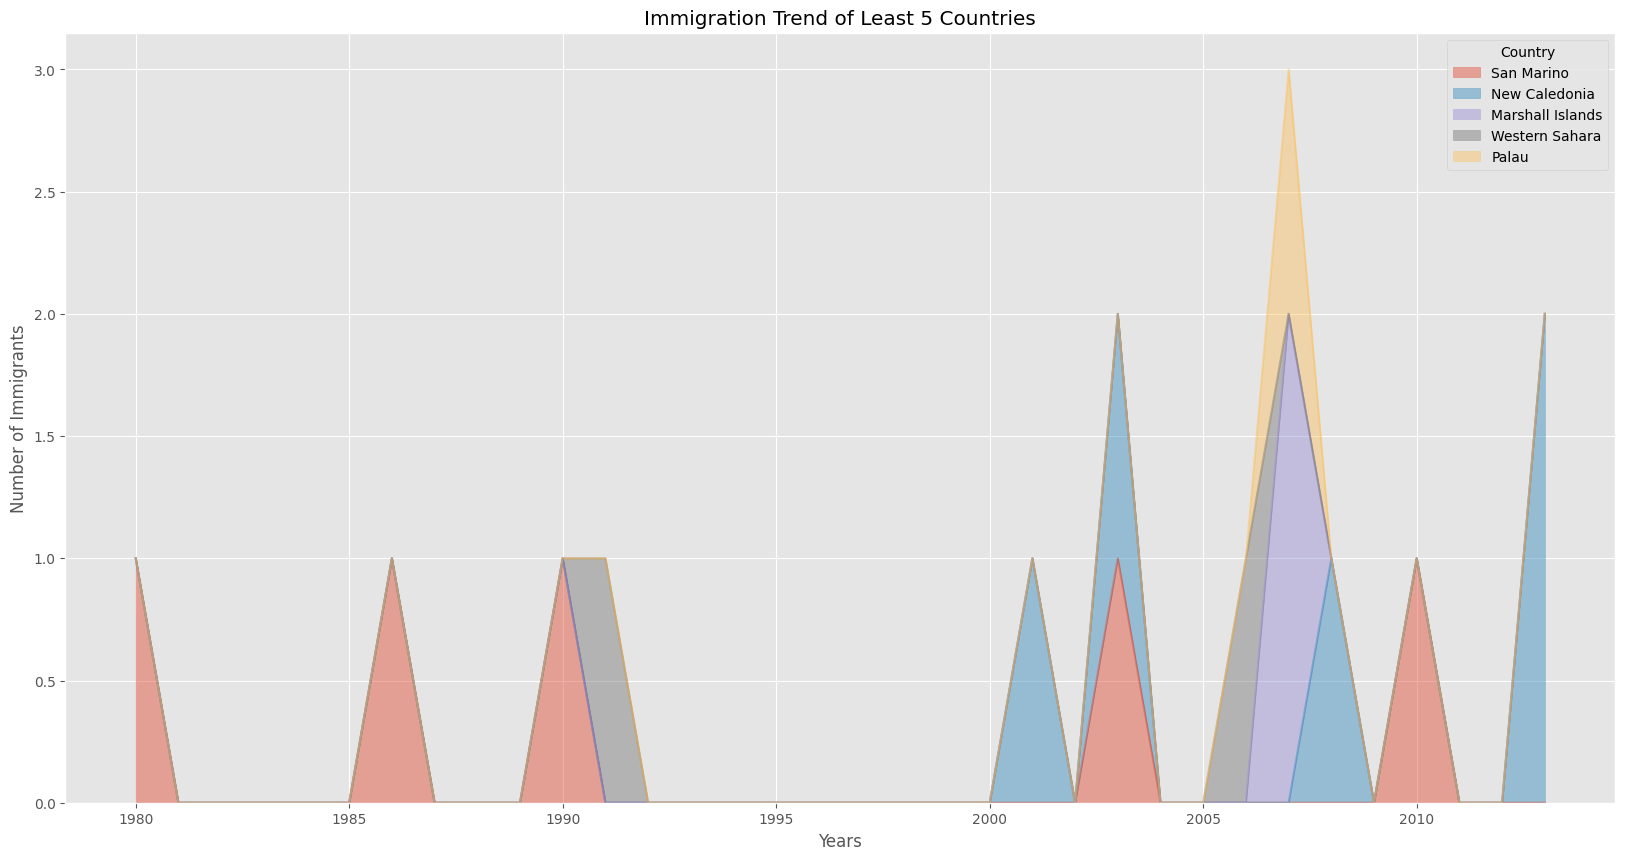

In [22]:
# Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 
# Use a transparency value of 0.55.

ax = df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

ax.set_title('Immigration Trend of Least 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [23]:
# Histograms
# A histogram is a way of representing the frequency distribution of numeric dataset. 
# The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. 
# So the y-axis is the frequency or the number of data points in each bin. 
# Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

In [24]:
# Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?
# Before we proceed with creating the histogram plot, let's first examine the data split into intervals. 
# To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [25]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [26]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])
print(count) # Prints the frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


In [27]:
# By default, the histrogram method breaks up the dataset into 10 bins. 
# The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

# 178 countries contributed between 0 to 3412.9 immigrants
# 11 countries contributed between 3412.9 to 6825.8 immigrants
# 1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

In [28]:
# We can easily graph this distribution by passing kind=hist to plot().

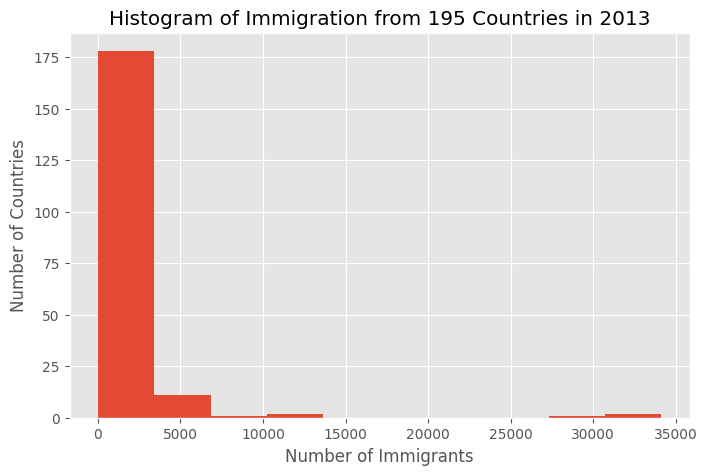

In [29]:

df_can['2013'].plot(kind = 'hist', figsize = (8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()


In [30]:
# In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. 
# The y-axis represents the number of countries that contributed to the aforementioned population.

# Notice that the x-axis labels do not match with the bin size. 
# This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

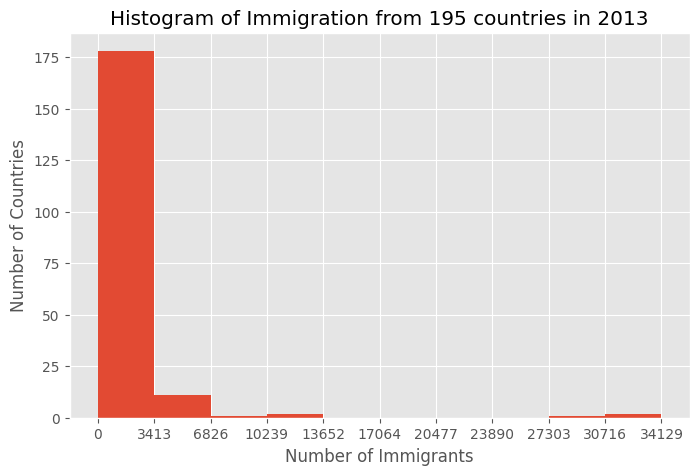

In [31]:
# bin-edges is a list of bin travels
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind = 'hist', figsize = (8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [32]:
# Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
# let quickly view the dataset

df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

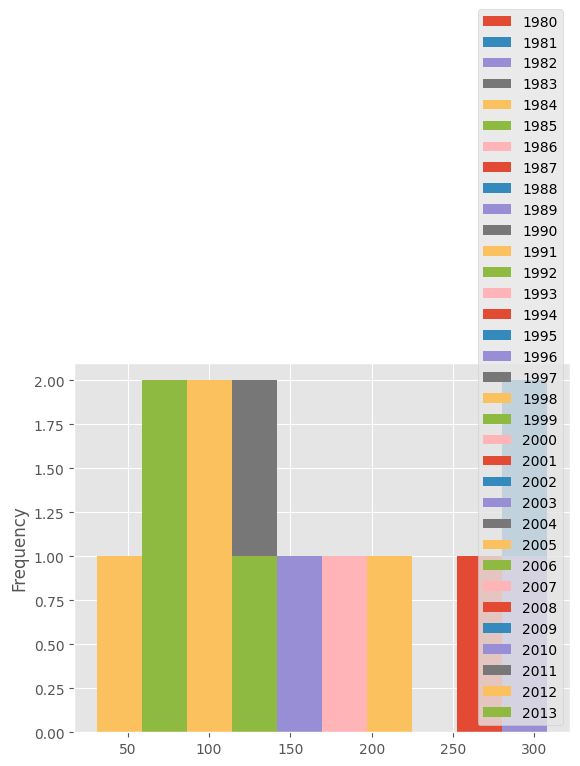

In [33]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [34]:
# This does not look right.

In [35]:
# Transposing the data
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


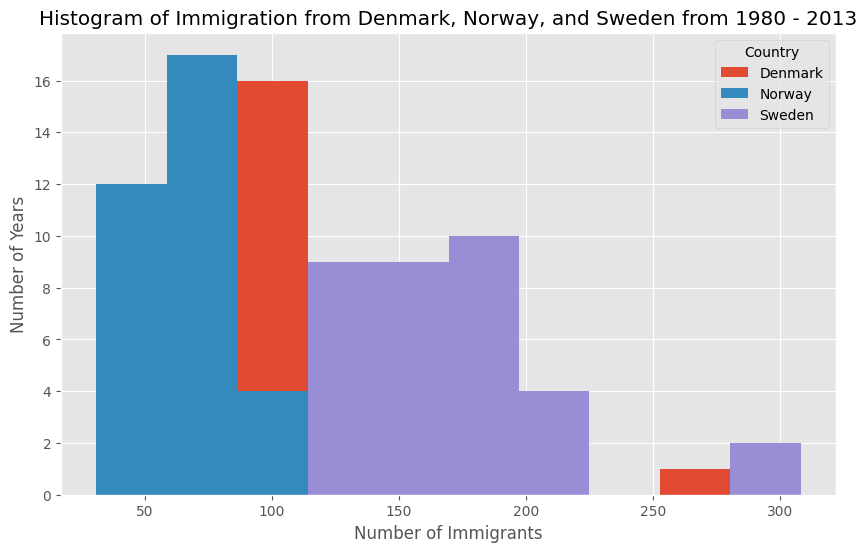

In [36]:
# generating historgram
df_t.plot(kind = 'hist', figsize = (10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [37]:
# Let's make a few modifications to improve the impact and aesthetics of the previous plot:

# increase the bin size to 15 by passing in bins parameter;
# set transparency to 60% by passing in alpha parameter;
# label the x-axis by passing in x-label parameter;
# change the colors of the plots by passing in color parameter.

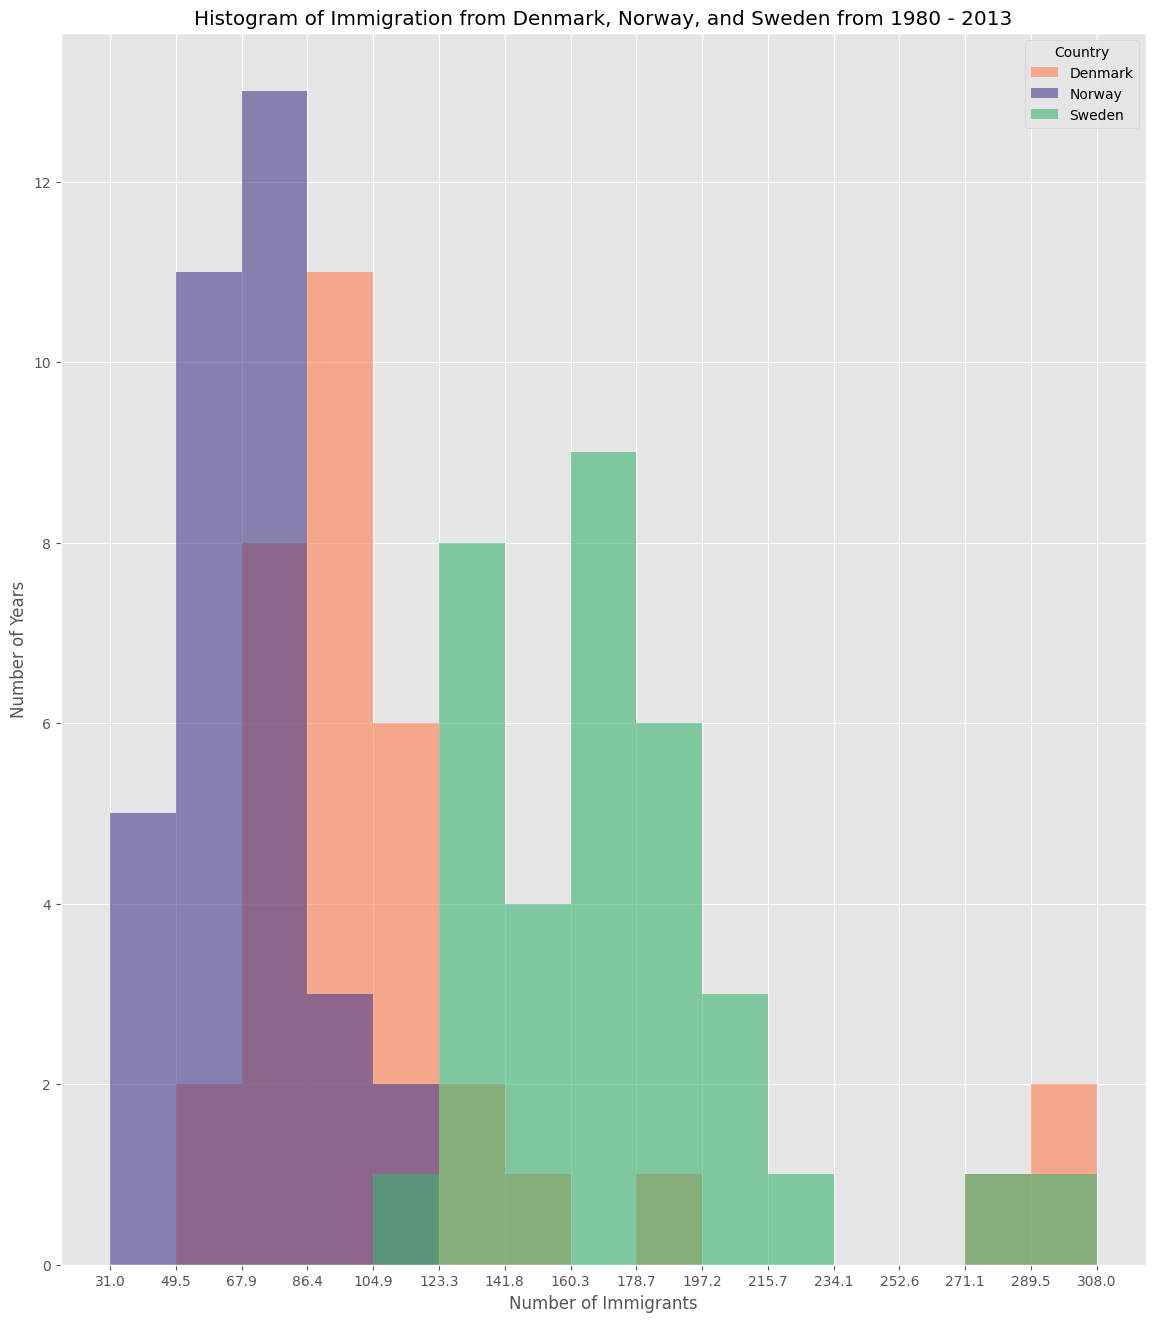

In [38]:
# let's get the tick values
count, bin_edges = np.histogram(df_t, 15)

# Un-stacked histograms
df_t.plot(kind = 'hist',
          figsize = (14, 16),
          bins = 15,
          alpha = 0.6,
          xticks = bin_edges, 
          color = ['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [39]:
# Tip: For a full listing of colors available in Matplotlib, run the following code in your python shell:

In [40]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [41]:
# If we do not want the plots to overlap each other, we can stack them using the stacked parameter. 
# Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. 
# We can pass a tuple (min,max) using the xlim paramater, as show below.

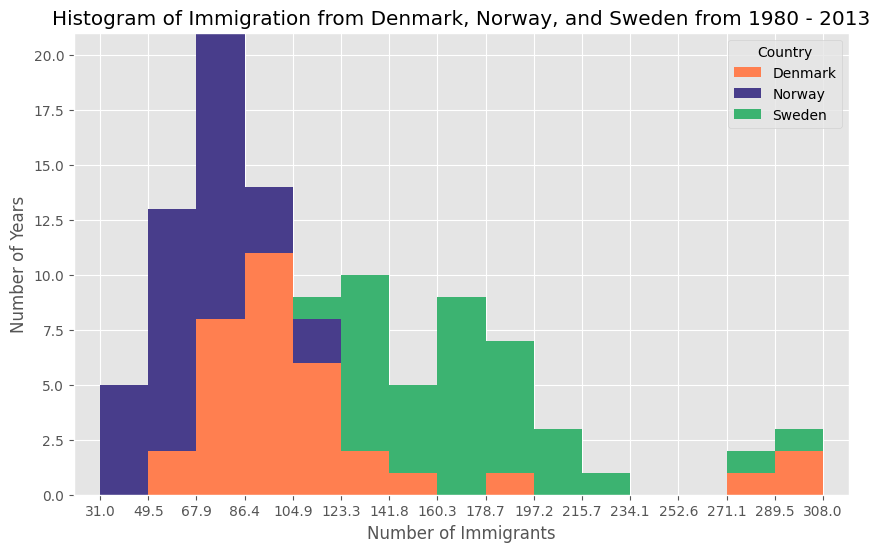

In [42]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [43]:
# Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? 
# Use an overlapping plot with 15 bins and a transparency value of 0.35.

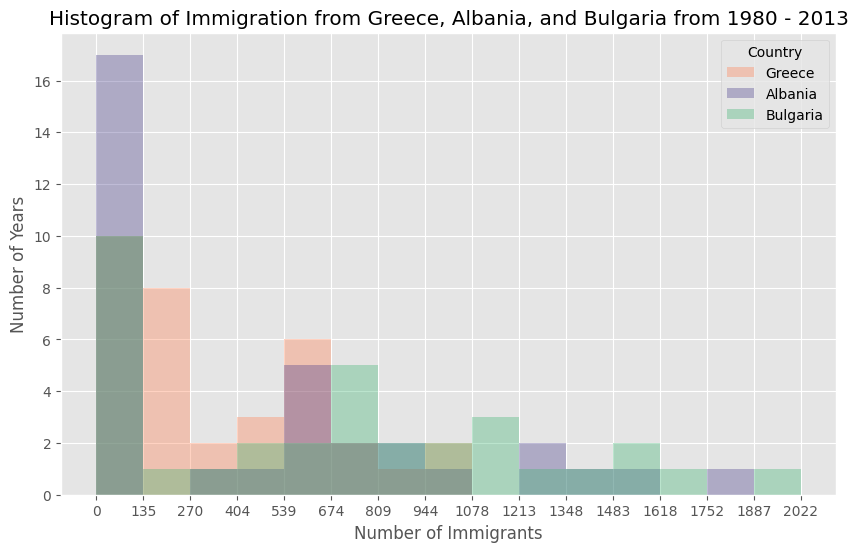

In [44]:
#The correct answer is:
    
# create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

    # transpose the dataframe
df_cof = df_cof.transpose() 

    # let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

    # Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
           )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [45]:
# Bar Charts (Dataframe)
# A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

# To create a bar plot, we can pass one of two arguments via kind parameter in plot():

# kind=bar creates a vertical bar plot
# kind=barh creates a horizontal bar plot

In [46]:
# Vertical bar plot

# In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. 
# Vertical bar graphs are particularly useful in analyzing time series data. 
# One disadvantage is that they lack space for text labelling at the foot of each bar.

In [47]:
# Let's start off by analyzing the effect of Iceland's Financial Crisis:

# The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. 
# Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.
# Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [48]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

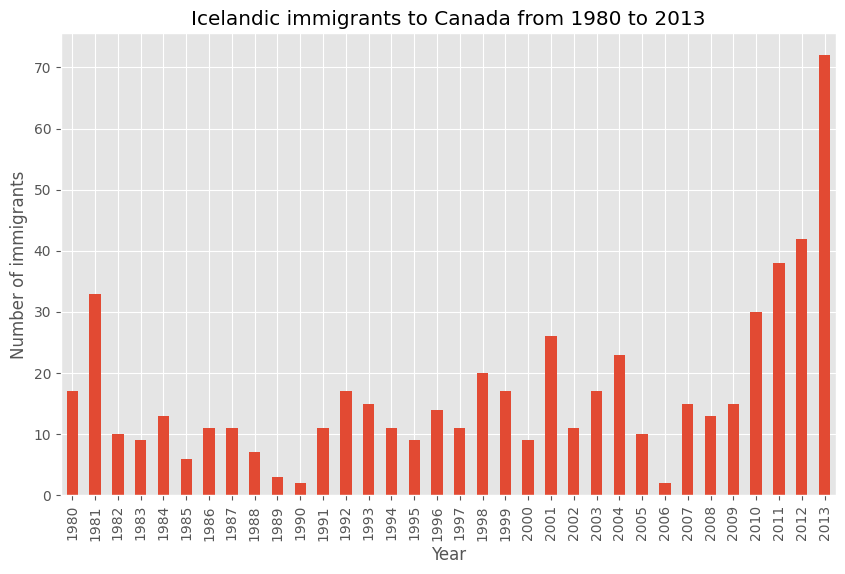

In [49]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

In [50]:
# I encourage you to read the Matplotlib documentation for more details on annotations: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html.

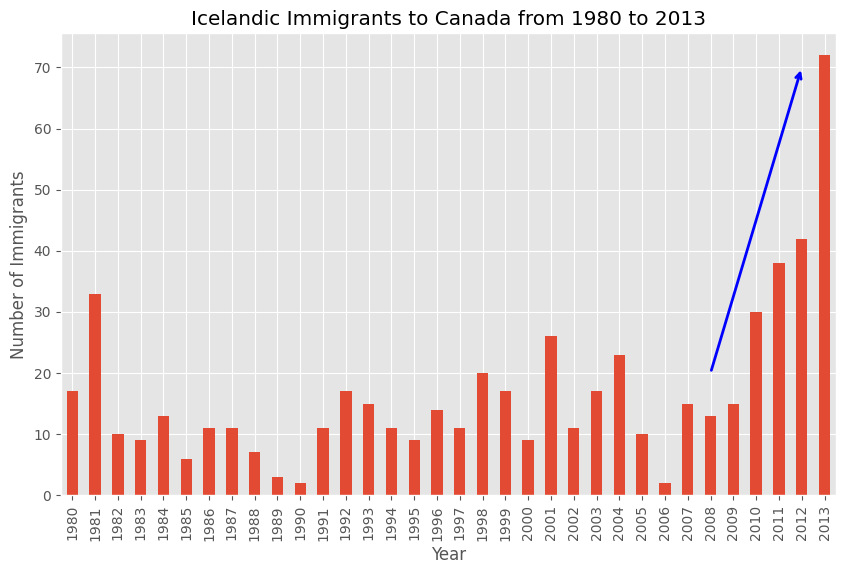

In [51]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

In [52]:
# Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:
# rotation: rotation angle of text in degrees (counter clockwise)
# va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
# ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

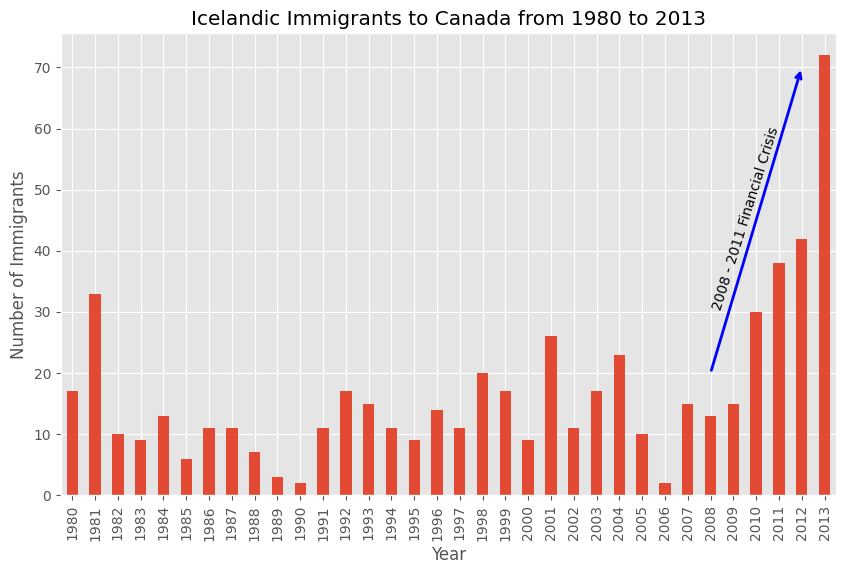

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [54]:
# Horizontal Bar Plot

# Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categorical variables.

# Question: Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [ ]:
# Step 1: Get the data pertaining to the top 15 countries.

In [56]:
#The correct answer is:
    
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

In [57]:
# Step 2: Plot data:

# Use kind='barh' to generate a bar chart with horizontal bars.
# Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
# Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

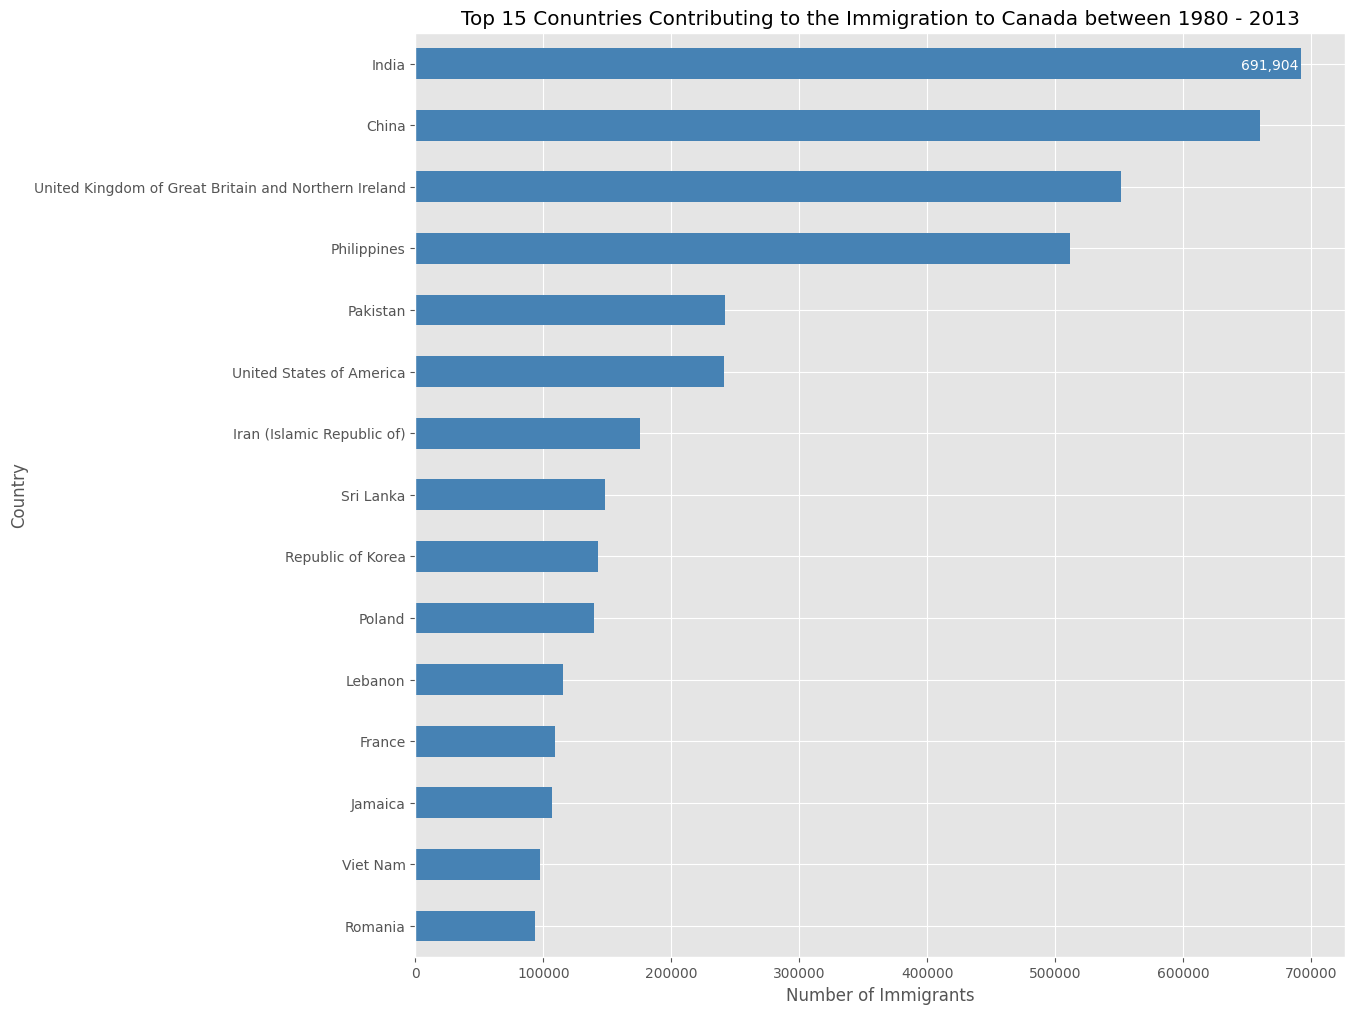

In [59]:
#The correct answer is:
    
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()